In [1]:
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import matplotlib.pyplot as plt
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env.dummy_vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize, SubprocVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env
import gym
import numpy as np
import time
from stable_baselines3.common.callbacks import EvalCallback
import env_test1
env = env_test1.DroneEnv()
check_env(env)
env = DummyVecEnv([lambda: env])

In [2]:
# Evaluation callback
callbacks = []
eval_callback = EvalCallback(
    env,
    callback_on_new_best=None,
    n_eval_episodes=8,
    best_model_save_path=".",
    log_path=".",
    eval_freq=4000,
)

callbacks.append(eval_callback)
kwargs = {}
kwargs["callback"] = callbacks

log_name = "ppo_run_" + str(time.time())

[895.9240138995925, 502.5984329260545]
[ 0.          0.01070976  0.          0.          0.          0.
  0.          0.         -0.13246065] [-0.00118623] -25.126331203746076
[900.0083626572139, 505.48254374676117]
[ 0.         0.0187837  0.         0.         0.         0.
  0.         0.        -0.1360654] [-0.00894331] -39.70551651076562
[904.1072469391975, 508.34595912754463]
[ 0.          0.02656446  0.          0.          0.          0.
  0.          0.         -0.13844989] [-0.005058] -53.74200647202656
[908.2237417636273, 511.18399900753957]
[ 0.          0.03402802  0.          0.          0.          0.
  0.          0.         -0.14120933] [-0.00617754] -67.21305248239105
[912.3547798680091, 514.0008277528036]
[ 0.          0.04118229  0.          0.          0.          0.
  0.          0.         -0.14365673] [-0.00514362] -80.12381590539894
[916.4999487139117, 516.7968204636235]
[ 0.          0.04802178  0.          0.          0.          0.
  0.          0.         -0

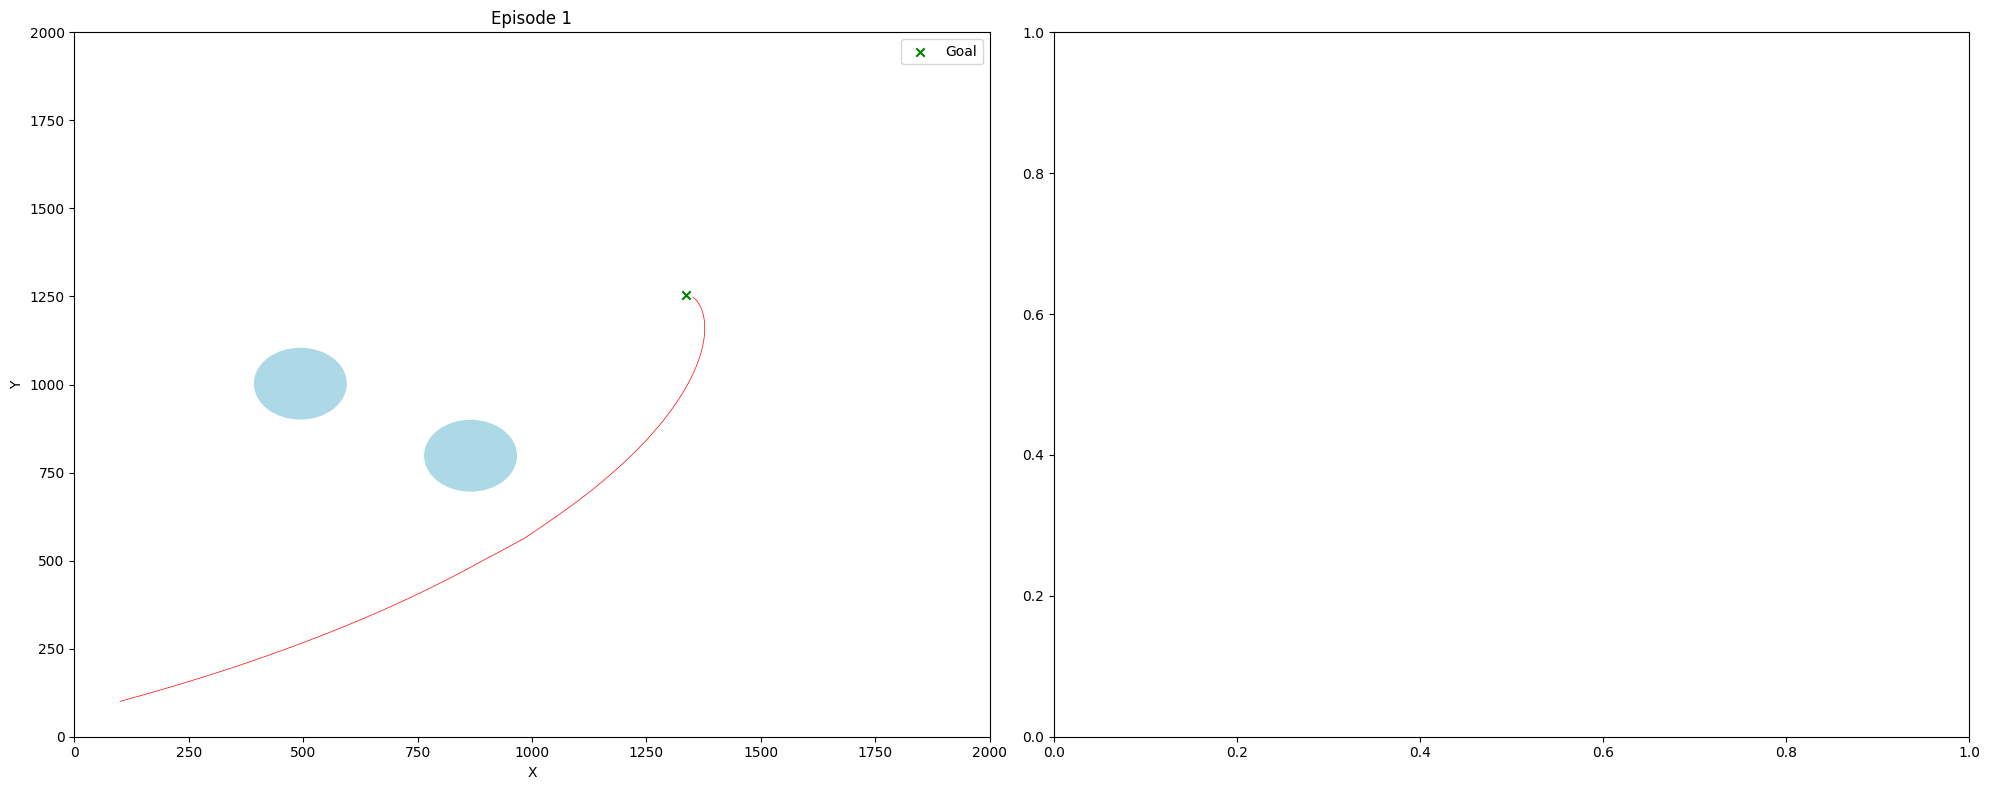

In [3]:
import matplotlib.pyplot as plt

# 创建一个包含10个子图的窗口
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs = axs.ravel()  # 将二维数组展平，方便通过索引访问每个子图

env = env_test1.DroneEnv()
for i in range(1):
    
    # 重置环境
    state, info = env.reset()
    trajectory_x = [env.xy_p[0]]  # 存储无人机路径的x坐标
    trajectory_y = [env.xy_p[1]]  # 存储无人机路径的y坐标
    trajectory_ex = [env.xy_e[0]]  # 存储无人机路径的x坐标
    trajectory_ey = [env.xy_e[1]]  # 存储无人机路径的y坐标
    
    # 在第i个子图中绘制环境和障碍物
    axs[i].scatter(env.xy_e[0], env.xy_e[1], marker='x', color='green', label='Goal')
    for k in env.obstacles:
        obstacle_circle = plt.Circle(k, env.r_obstacles, color='lightblue', fill=True)
        axs[i].add_patch(obstacle_circle)
    axs[i].set_xlim(env.space1.low[0], env.space1.high[0])
    axs[i].set_ylim(env.space1.low[1], env.space1.high[1])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].legend()
    axs[i].set_title(f'Episode {i+1}')

    # 通过预训练模型控制无人机执行任务并绘制路径
    model = PPO.load("last_model") 
    done = False
    total_reward = 0
    count = 0
    while not done:
        count += 1
        action, _states = model.predict(state, deterministic=True)
        next_state, reward, done, t, info = env.step(action)
        if reward < -10:
            print(env.xy_p)
            print(state, action, reward)
        if count > 500:
            done = True
        total_reward += reward
        state = next_state
        trajectory_x.append(env.xy_p[0])  # 更新无人机路径的x坐标
        trajectory_y.append(env.xy_p[1])  # 更新无人机路径的y坐标
        trajectory_ex.append(env.xy_e[0])  # 更新无人机路径的x坐标
        trajectory_ey.append(env.xy_e[1])  # 更新无人机路径的y坐标

    # 绘制无人机路径
    axs[i].plot(trajectory_x, trajectory_y, color='red', linewidth=0.5)
    axs[i].plot(trajectory_ex, trajectory_ey, color='red', linewidth=0.5)

    # 打印每个episode的总奖励
    print(f'Episode {i+1} total reward:', total_reward)

# 显示子图窗口
plt.tight_layout()
plt.show()
